In [1]:
import warnings

import df_utils as utils
from df_model import (
    CLF_DECISION_TREE,
    CLF_LOGISTIC_REGRESSION,
    CLF_SUPPORT_VECTOR,
    PIPE_CLASSIFIER,
    PIPE_ENCODER,
    PIPE_IMPUTER,
    PIPE_SCALER,
    PIPE_SELECTOR,
    PIPE_TRANSFORMER,
    DataModel,
)
# from sklearnex import patch_sklearn # pip install scikit-learn-intelex

In [2]:
############ PRODUCTION SETTINGS ############

# optimize scikit runtime for intel processor
# patch_sklearn() # uncomment if installed

# ignore unproblematic parameter warnings
warnings.filterwarnings("ignore")

In [3]:
%%capture
# run preprocessing notebook
%run df4_bcancer_prep.ipynb

In [4]:
############ CONFIGURATION ############

# list desired settings
data_config = {
    "dataset": "breast_cancer",
    "index": "ID",
    "target": "class",
    "has_imbalance": True,
    "has_test": True,
    "use_raw": True,
    "n_folds": 10,
    "scoring": "f1_weighted",
    "cv_random": False,
    "cv_iter": 10,
}

# choose desired final classifiers and pipeline modelling steps
final_models = {
    CLF_LOGISTIC_REGRESSION: [PIPE_ENCODER, PIPE_IMPUTER, PIPE_TRANSFORMER, PIPE_SCALER, PIPE_SELECTOR, PIPE_CLASSIFIER],
    CLF_SUPPORT_VECTOR: [PIPE_ENCODER, PIPE_IMPUTER, PIPE_TRANSFORMER, PIPE_SCALER, PIPE_SELECTOR, PIPE_CLASSIFIER],
    CLF_DECISION_TREE: [PIPE_ENCODER, PIPE_IMPUTER, PIPE_TRANSFORMER, PIPE_SCALER, PIPE_SELECTOR, PIPE_CLASSIFIER],
}

# pipeline steps: encoders, imputers, transformers, scalers, feature selectors, classifiers
[PIPE_ENCODER, PIPE_IMPUTER, PIPE_TRANSFORMER, PIPE_SCALER, PIPE_SELECTOR, PIPE_CLASSIFIER]

['enc', 'imp', 'trf', 'scl', 'fsl', 'clf']

In [5]:
# NOTE: configuration has been chosen such that all three classifiers need a reasonable runtime and not the optimal results
# during testing and the kaggle competition, each classifier was isolated and provided with different ...
# parameter settings ("file df_model.py")
# pipeline steps (var "final_models")
# cross-validation folds (var "n_folds")
# hypertuning iterations (var "cv_iter")

In [6]:
# import data set
(data, data_test) = utils.import_data(data_config["dataset"], data_config["has_test"], data_config["use_raw"])

importing from: data/data_raw/breast_cancer.csv


In [7]:
# set data index
data = utils.set_data_index(data, data_config["index"])
if data_config["has_test"]:
    data_test = utils.set_data_index(data_test, data_config["index"])

In [8]:
############ MODELLING ############

# create data set model
data_model = DataModel(data, data_config["target"], data_test, data_config["has_imbalance"], data_config["n_folds"])

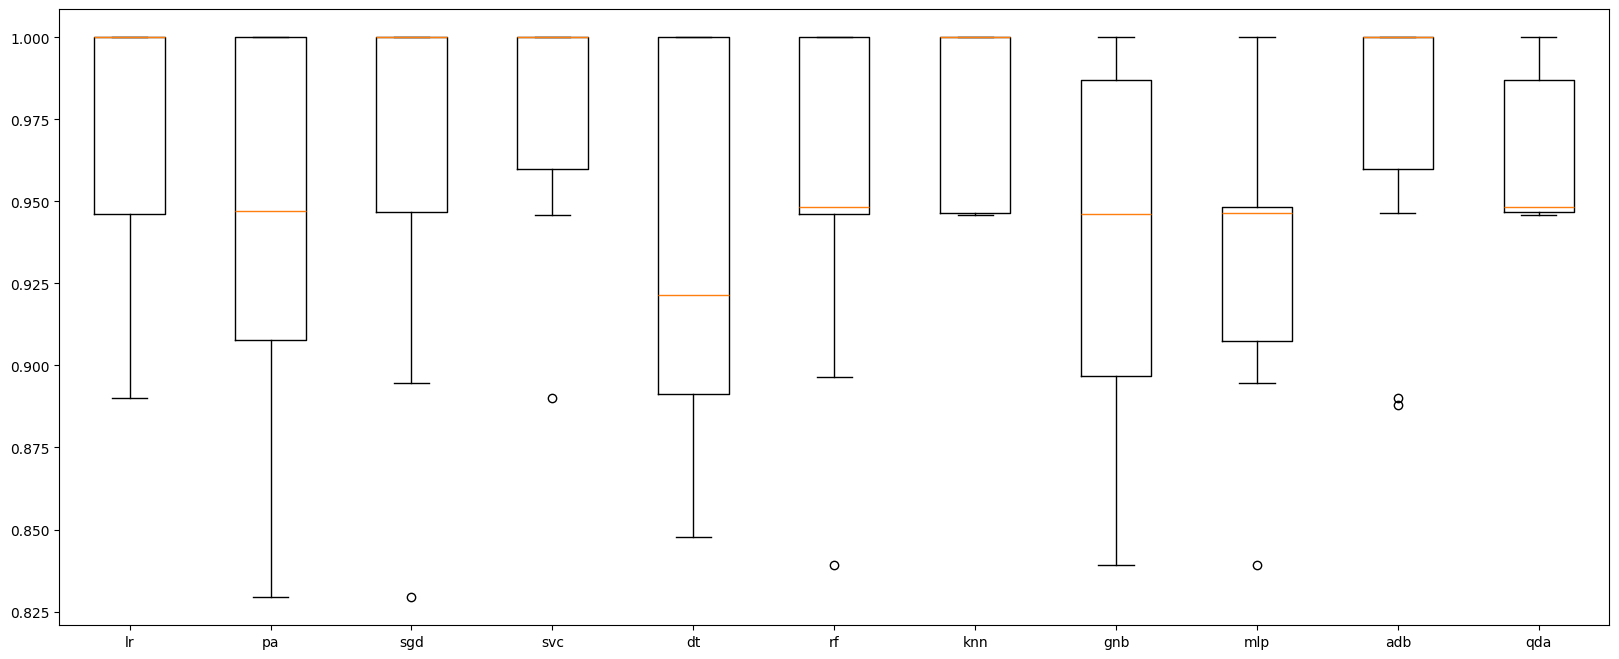

In [9]:
############ CLASSIFIER SELECTION ############

# plot classifier performance on training data out of the box
data_model.plot_models_train_performance(scale=True, encode=True)

In [10]:
# print classifier performance on test data out of the box
data_model.print_models_test_performance(scale=True, encode=True)

lr - accuracy: 0.968421052631579 / f1: 0.9680117182013364
pa - accuracy: 0.9578947368421052 / f1: 0.9581931368009466
sgd - accuracy: 0.9789473684210527 / f1: 0.9787722835314092
svc - accuracy: 0.968421052631579 / f1: 0.9680117182013364
dt - accuracy: 0.9263157894736842 / f1: 0.9265878542510121
rf - accuracy: 0.9368421052631579 / f1: 0.9368421052631579
knn - accuracy: 0.9578947368421052 / f1: 0.9575445670628183
gnb - accuracy: 0.9157894736842105 / f1: 0.9163862736018932
mlp - accuracy: 0.9157894736842105 / f1: 0.9142780026990553
adb - accuracy: 0.9263157894736842 / f1: 0.9265878542510121
qda - accuracy: 0.9263157894736842 / f1: 0.927066848044757


In [11]:
############ HYPERPARAMETER TUNING ############

# tune the parameters of the chosen final classifiers and pipeline steps
optimal_models = {}
for classifier_name, model_steps in final_models.items():
    print(f"---------current model: {classifier_name}---------")
    optimal_models[classifier_name] = data_model.train_model_classifier(classifier_name, model_steps, random=data_config["cv_random"], n_iter=data_config["cv_iter"], performance=data_config["scoring"])

---------current model: lr---------
tuned enc score: 0.9232767427504271
tuned imp score: 0.9232767427504271
tuned trf score: 0.9456232773074879
tuned scl score: 0.9838744257691626
tuned fsl score: 0.9892347496558023
tuned clf score: 0.994595073542442
---------current model: svc---------
tuned enc score: 0.9005723126775758
tuned imp score: 0.9005723126775758
tuned trf score: 0.9005723126775758
tuned scl score: 0.9784694993116044
tuned fsl score: 0.9838744257691626
tuned clf score: 0.9892347496558023
---------current model: dt---------
tuned enc score: 0.9363245377810596
tuned imp score: 0.9363245377810596
tuned trf score: 0.9363245377810596
tuned scl score: 0.9363245377810596
tuned fsl score: 0.9576187950535775
tuned clf score: 0.9628209308277956


In [12]:
############ MODEL EVALUATION ############

# display the produced model pipelines
for model in optimal_models.values():
    display(model)

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('numerical', 'passthrough',
                                                  Index(['radiusMean', 'textureMean', 'perimeterMean', 'areaMean',
       'smoothnessMean', 'compactnessMean', 'concavityMean',
       'concavePointsMean', 'symmetryMean', 'fractalDimensionMean',
       'radiusStdErr', 'te...
                 ColumnTransformer(transformers=[('positive',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])),
                                                 ('negative', 'passthrough',
                                                  array([], dtype=int64))])),
                ('scl', StandardScaler()), ('fsl', SelectKBest(k=22)),
                ('clf',
                 LogisticRegression(C=2.1544346900318834, max_iter=500,
                                    random_state=42))])

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('numerical', 'passthrough',
                                                  Index(['radiusMean', 'textureMean', 'perimeterMean', 'areaMean',
       'smoothnessMean', 'compactnessMean', 'concavityMean',
       'concavePointsMean', 'symmetryMean', 'fractalDimensionMean',
       'radiusStdErr', 'te...
       'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst',
       'smoothnessWorst', 'compactnessWorst', 'concavityWorst',
       'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst'],
      dtype='object'))])),
                ('imp', SimpleImputer()), ('trf', None),
                ('scl', StandardScaler()), ('fsl', SelectKBest(k=25)),
                ('clf',
                 SVC(decision_function_shape='ovo', kernel='linear',
                     random_state=42))])

Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('numerical', 'passthrough',
                                                  Index(['radiusMean', 'textureMean', 'perimeterMean', 'areaMean',
       'smoothnessMean', 'compactnessMean', 'concavityMean',
       'concavePointsMean', 'symmetryMean', 'fractalDimensionMean',
       'radiusStdErr', 'te...
       'concavePointsStdErr', 'symmetryStdErr', 'fractalDimensionStdErr',
       'radiusWorst', 'textureWorst', 'perimeterWorst', 'areaWorst',
       'smoothnessWorst', 'compactnessWorst', 'concavityWorst',
       'concavePointsWorst', 'symmetryWorst', 'fractalDimensionWorst'],
      dtype='object'))])),
                ('imp', SimpleImputer()), ('trf', None), ('scl', None),
                ('fsl', SelectKBest(k=19)),
                ('clf', DecisionTreeClassifier(max_depth=4, random_state=42))])

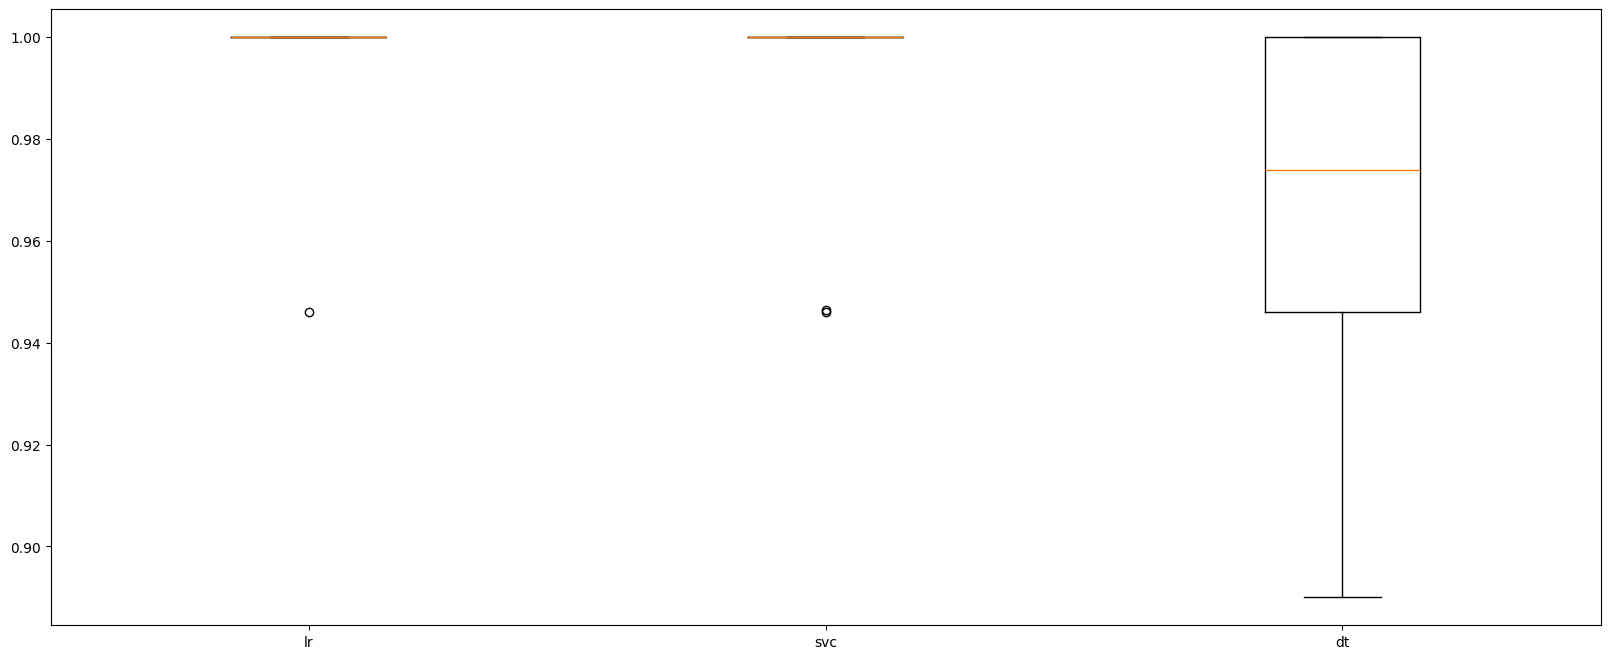

In [13]:
# check for train classifier performance with optimized settings
data_model.plot_models_train_performance(optimal_models)

In [14]:
# check for test classifier performance with optimized settings
data_model.print_models_test_performance(optimal_models)

lr - accuracy: 0.9789473684210527 / f1: 0.9789473684210527
svc - accuracy: 0.9789473684210527 / f1: 0.9789473684210527
dt - accuracy: 0.9157894736842105 / f1: 0.9150891341256367


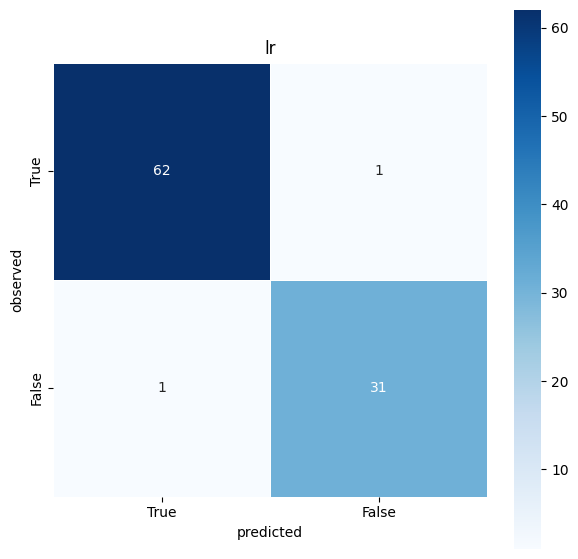

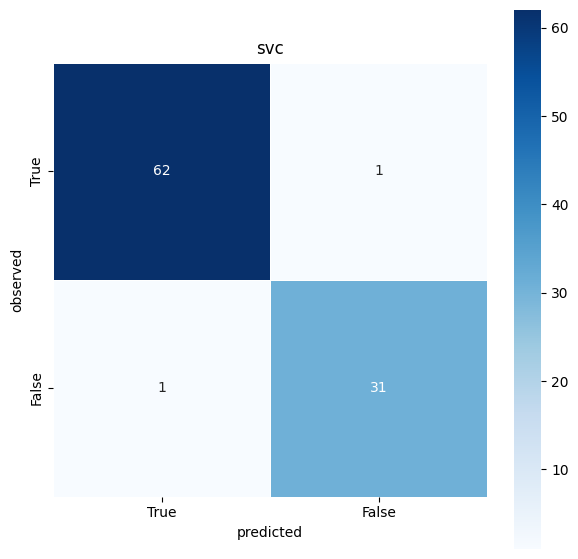

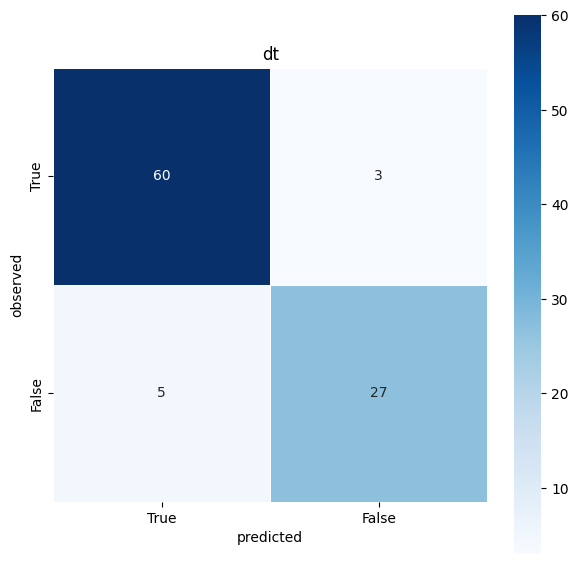

In [15]:
# visualize confusion matrix of models on test data
data_model.plot_models_test_cmatrix(optimal_models)

In [16]:
############ KAGGLE HAND-IN ############

# prepare final prediction on new test data
if data_config["has_test"]:
    for model_name, model in optimal_models.items():
        data_test_fin = data_model.fit_model_newdata(model)
        utils.export_data(data_test_fin, data_config["dataset"] + "_" + model_name, predict=True)

        display(data_test_fin)

,class
ID,
9012568,False
844981,True
8813129,False
881094802,False
88350402,False
...,...
9010598,False
862485,False
8910506,False


,class
ID,
9012568,False
844981,True
8813129,False
881094802,True
88350402,False
...,...
9010598,False
862485,False
8910506,False


,class
ID,
9012568,False
844981,True
8813129,False
881094802,True
88350402,False
...,...
9010598,False
862485,False
8910506,False
